In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

L2_1 = [10 ** p for p in range(2, 8)]
L2_2 = [10 ** p for p in range(2, 9)]
# RHO = [10 ** p for p in range(1, 5)]  # no rho scaling 
RHO = 0
# RHO = [500, 100000]
DELTA = 0
MAX_ITER = 1
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [100, 1000, 10000, 100000, 1000000, 10000000],
 'l2_2': [100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
 'rho': 0,
 'delta': 0,
 'max_iterations': 1}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


/home/jdepauw/TEASER/teaser/algorithm/teaser_s.py:132: RuntimeWarning: divide by zero encountered in true_divide
  beta /= (XTX_diag + self.l2_1 + 2 * self.rho)


norm E 155.8897097580512
diag norm: 13.701600929106306
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.004
Average Recall@100 0.015
Average nDCG@100 0.004
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.1868147531430786
diag norm: 0.4448863146835258
diag_diff: 0.9901534901853445


Evaluating with 2000 users
Average Recall@20 0.115
Average Recall@100 0.251
Average nDCG@100 0.086
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0249264665884821
diag norm: 0.04650900354646733
diag_diff: 0.09098605953164891


Evaluating with 2000 users
Average Recall@20 0.111
Average Recall@100 0.24
Average nDCG@100 0.08
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.002616612051682936
diag norm: 0.004685538915342081
diag_diff: 0.009030329070386632


Evaluating with 2000 users
Average Recall@20 0.11
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0002630272393880104
diag norm: 0.0004689230963771438
diag_diff: 0.0009023597860800457


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.6316524108527052e-05
diag norm: 4.689602622457843e-05
diag_diff: 9.022925673302142e-05


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 497.4383237897885
diag norm: 39.34293237997601
diag_diff: 66.18675722186318


Evaluating with 2000 users
Average Recall@20 0.001
Average Recall@100 0.008
Average nDCG@100 0.002
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.16073415718559567
diag norm: 0.4377652682883149
diag_diff: 0.9870881768392262


Evaluating with 2000 users
Average Recall@20 0.118
Average Recall@100 0.252
Average nDCG@100 0.086
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.024005904066428586
diag norm: 0.04638499751379147
diag_diff: 0.09092562940392003


Evaluating with 2000 users
Average Recall@20 0.111
Average Recall@100 0.24
Average nDCG@100 0.08
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00260380424507735
diag norm: 0.004684108845918615
diag_diff: 0.009029624708597066


Evaluating with 2000 users
Average Recall@20 0.11
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0002628938082252625
diag norm: 0.0004689085419908328
diag_diff: 0.0009023526095235298


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.6315184180587947e-05
diag norm: 4.6895880418145795e-05
diag_diff: 9.022918482992031e-05


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 152.68346696592113
diag norm: 25.387475971239635
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.001
Average Recall@100 0.01
Average nDCG@100 0.002
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.11340861050553708
diag norm: 0.4031470291684928
diag_diff: 0.9726301375466557


Evaluating with 2000 users
Average Recall@20 0.116
Average Recall@100 0.256
Average nDCG@100 0.087
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.021039691824576538
diag norm: 0.045596141433680626
diag_diff: 0.09054549681046498


Evaluating with 2000 users
Average Recall@20 0.113
Average Recall@100 0.243
Average nDCG@100 0.081
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0025113702379250245
diag norm: 0.004671508725109577
diag_diff: 0.00902343499526644


Evaluating with 2000 users
Average Recall@20 0.111
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00026161280367242856
diag norm: 0.00046876530299852195
diag_diff: 0.0009022820020548643


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.6301840854767397e-05
diag norm: 4.689442474341966e-05
diag_diff: 9.022846699962653e-05


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1.8180015626632735
diag norm: 1.8542288986904194
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.011
Average Recall@100 0.033
Average nDCG@100 0.009
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.05193851350079144
diag norm: 0.2772893348456237
diag_diff: 0.9306084605846927


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.24
Average nDCG@100 0.08
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.013861536401458083
diag norm: 0.04183985089173485
diag_diff: 0.08884362076206914


Evaluating with 2000 users
Average Recall@20 0.115
Average Recall@100 0.247
Average nDCG@100 0.084
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0022038661359349105
diag norm: 0.0045911088597471676
diag_diff: 0.008984552073000251


Evaluating with 2000 users
Average Recall@20 0.112
Average Recall@100 0.239
Average nDCG@100 0.08
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0002523640924854862
diag norm: 0.0004675031112957251
diag_diff: 0.000901661537266524


Evaluating with 2000 users
Average Recall@20 0.11
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.6173737996906992e-05
diag norm: 4.6880098502611346e-05
diag_diff: 9.022140453666133e-05


Evaluating with 2000 users
Average Recall@20 0.109
Average Recall@100 0.236
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.032069194164440644
diag norm: 0.16992848089031778
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.059
Average Recall@100 0.129
Average nDCG@100 0.045
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.014534140606268233
diag norm: 0.09946410319899024
diag_diff: 0.8943559961374582


Evaluating with 2000 users
Average Recall@20 0.086
Average Recall@100 0.189
Average nDCG@100 0.063
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.005691607553501288
diag norm: 0.02868591190711608
diag_diff: 0.08409574451421796


Evaluating with 2000 users
Average Recall@20 0.103
Average Recall@100 0.217
Average nDCG@100 0.073
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0014284740590237836
diag norm: 0.004209246663515486
diag_diff: 0.008811699987304893


Evaluating with 2000 users
Average Recall@20 0.113
Average Recall@100 0.245
Average nDCG@100 0.084
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0002214854849695021
diag norm: 0.0004594463958504429
diag_diff: 0.0008977644593648099


Evaluating with 2000 users
Average Recall@20 0.112
Average Recall@100 0.238
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.5248811911427853e-05
diag norm: 4.675385732817372e-05
diag_diff: 9.015934309706825e-05


Evaluating with 2000 users
Average Recall@20 0.11
Average Recall@100 0.237
Average nDCG@100 0.079
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0032844845164052973
diag norm: 0.02382860179663823
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.04
Average Recall@100 0.082
Average nDCG@100 0.029
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0026847845732863866
diag norm: 0.018766961710053844
diag_diff: 0.8861976344190943


Evaluating with 2000 users
Average Recall@20 0.053
Average Recall@100 0.107
Average nDCG@100 0.038
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0015734019861255672
diag norm: 0.010333634805547788
diag_diff: 0.08026587870600037


Evaluating with 2000 users
Average Recall@20 0.078
Average Recall@100 0.176
Average nDCG@100 0.059
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0005769740561236043
diag norm: 0.00288342311301736
diag_diff: 0.008330208410674566


Evaluating with 2000 users
Average Recall@20 0.102
Average Recall@100 0.214
Average nDCG@100 0.072
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0001432995273714864
diag norm: 0.0004211917550770567
diag_diff: 0.0008804530603562717


Evaluating with 2000 users
Average Recall@20 0.113
Average Recall@100 0.245
Average nDCG@100 0.084
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.215964694324189e-05
diag norm: 4.594801671021896e-05
diag_diff: 8.97695473730814e-05


Evaluating with 2000 users
Average Recall@20 0.112
Average Recall@100 0.238
Average nDCG@100 0.08
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0007387878952181964
diag norm: 0.004759115305106906
diag_diff: inf


Evaluating with 2000 users
Average Recall@20 0.015
Average Recall@100 0.034
Average nDCG@100 0.009
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0005660472056159985
diag norm: 0.0037573855736618613
diag_diff: 0.8848299987687225


Evaluating with 2000 users
Average Recall@20 0.019
Average Recall@100 0.041
Average nDCG@100 0.013
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0002994049352879232
diag norm: 0.0020553522549514175
diag_diff: 0.07965554282200356


Evaluating with 2000 users
Average Recall@20 0.044
Average Recall@100 0.086
Average nDCG@100 0.031
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00015918220627518504
diag norm: 0.0010393320563118586
diag_diff: 0.007944150623075729


Evaluating with 2000 users
Average Recall@20 0.078
Average Recall@100 0.175
Average nDCG@100 0.058
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 5.778048680203715e-05
diag norm: 0.0002884985469740072
diag_diff: 0.0008322355588412495


Evaluating with 2000 users
Average Recall@20 0.102
Average Recall@100 0.214
Average nDCG@100 0.072
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 100000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 1.4334504937613836e-05
diag norm: 4.212186173002688e-05
diag_diff: 8.803814612907088e-05


Evaluating with 2000 users
Average Recall@20 0.113
Average Recall@100 0.245
Average nDCG@100 0.084



In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.08740107257984432 achieved with {'l2_1': 1000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.11340861050553708
diag norm: 0.4031470291684928
diag_diff: 0.9726301375466557


CPU times: user 2min 33s, sys: 46 s, total: 3min 19s
Wall time: 12.4 s


In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.118
Average Recall@100 0.273
Average nDCG@100 0.088


## Plot amount of items from long tail recommended

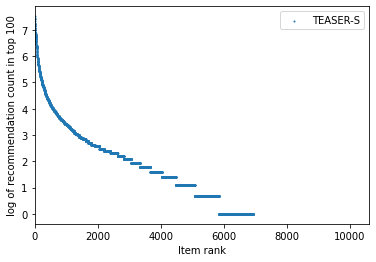

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)